In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import utils.get_data as get_data

# RAMP on predicting cyclist traffic in Paris

Authors: *Roman Yurchak (Symerio)*; also partially inspired by the air_passengers starting kit.


## Introduction

The dataset was collected with cyclist counters installed by Paris city council in multiple locations. It contains hourly information about cyclist traffic, as well as the following features,
 - counter name
 - counter site name
 - date
 - counter installation date
 - latitude and longitude
 
Available features are quite scarce. However, **we can also use any external data that can help us to predict the target variable.** 

In [2]:
# merge original data + external data
X_train = pd.read_parquet("data/train.parquet")
merged_X_train_external_DATA = get_data._merge_external_data_weather(X_train)
merged_X_train_external_DATA.head()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,counter_technical_id,latitude,longitude,log_bike_count,ff,u,ssfrai,n,vv,rr3,t
107,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.000000,1.6,81,0.0,0.0,30000,0.0,285.75
157,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.693147,1.1,88,0.0,0.0,25000,0.0,283.95
193,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.000000,1.1,88,0.0,0.0,25000,0.0,283.95
769,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,1.609438,4.0,41,0.0,60.0,30000,0.0,293.65
959,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,2.302585,3.0,47,0.0,90.0,30000,0.0,292.15


In [3]:
# merge original data + external data + holidays
merged_X_train_external_HOLIDAYS = get_data._merge_holidays_week_end(merged_X_train_external_DATA)
merged_X_train_external_HOLIDAYS.head()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,counter_technical_id,latitude,longitude,log_bike_count,ff,u,ssfrai,n,vv,rr3,t,is_holiday,is_weekend
107,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.000000,1.6,81,0.0,0.0,30000,0.0,285.75,0,0
157,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.693147,1.1,88,0.0,0.0,25000,0.0,283.95,0,0
193,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.000000,1.1,88,0.0,0.0,25000,0.0,283.95,0,0
769,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,1.609438,4.0,41,0.0,60.0,30000,0.0,293.65,0,0
959,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,2.302585,3.0,47,0.0,90.0,30000,0.0,292.15,0,0


In [4]:
# merge original data + external data + holidays + data COVID
merged_X_train_external_HOLIDAYS_COVID = get_data._merge_Curfews_lockdowns_COVID(merged_X_train_external_HOLIDAYS)
merged_X_train_external_HOLIDAYS_COVID = get_data._merge_indicators_COVID(merged_X_train_external_HOLIDAYS_COVID)
merged_X_train_external_HOLIDAYS_COVID.head()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,counter_technical_id,latitude,longitude,...,rr3,t,is_holiday,is_weekend,is_lockdown,is_curfew,hosp,rea,incid_rea,rad
107,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,...,0.0,285.75,0,0,False,False,293,42,3.0,6641
157,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,...,0.0,283.95,0,0,False,False,293,42,3.0,6641
193,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,...,0.0,283.95,0,0,False,False,293,42,3.0,6641
769,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,...,0.0,293.65,0,0,False,False,293,42,3.0,6641
959,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,...,0.0,292.15,0,0,False,False,293,42,3.0,6641


In [5]:
# merge original data + external data + holidays + data COVID + data accidents
merged_X_train_external_HOLIDAYS_COVID_ACCIDENTS = get_data._merge_road_accidents(merged_X_train_external_HOLIDAYS_COVID)
merged_X_train_external_HOLIDAYS_COVID_ACCIDENTS

KeyError: 'orig_index'

# Analysis of the original data given

In [22]:
data_orig = pd.read_parquet("data/train.parquet")
data_orig['date'] = pd.to_datetime(data_orig['date'])
print(data_orig["date"].min())
print(data_orig["date"].max())

2020-09-01 01:00:00
2021-08-09 23:00:00


In [23]:
data_orig.dtypes

counter_id                         category
counter_name                       category
site_id                               int64
site_name                          category
bike_count                          float64
date                         datetime64[us]
counter_installation_date    datetime64[us]
counter_technical_id               category
latitude                            float64
longitude                           float64
log_bike_count                      float64
dtype: object

In [24]:
data_orig.describe()

,site_id,bike_count,date,counter_installation_date,latitude,longitude,log_bike_count
count,4.551630e+05,455163.000000,455163,455163,455163.000000,455163.000000,455163.000000
mean,1.051759e+08,59.483596,2021-02-20 17:35:32.335009,2019-04-03 20:37:58.529670,48.854357,2.345529,3.048589
min,1.000070e+08,0.000000,2020-09-01 01:00:00,2013-01-18 00:00:00,48.826360,2.265420,0.000000
25%,1.000475e+08,4.000000,2020-11-27 21:00:00,2018-11-29 00:00:00,48.840801,2.314440,1.609438
50%,1.000562e+08,28.000000,2021-02-20 23:00:00,2019-11-06 00:00:00,48.852090,2.353870,3.367296
75%,1.000563e+08,79.000000,2021-05-17 08:00:00,2019-12-11 00:00:00,48.864610,2.375870,4.382027
max,3.000147e+08,1275.000000,2021-08-09 23:00:00,2020-11-29 00:00:00,48.891720,2.409690,7.151485
std,3.160033e+07,87.129357,NaN,NaN,0.018559,0.038013,1.675059


<Axes: xlabel='date'>

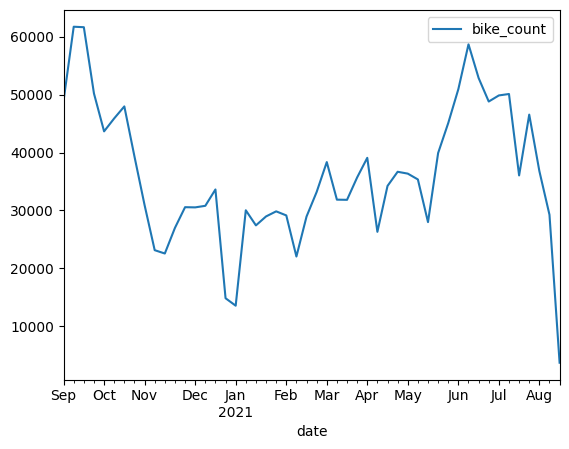

In [26]:
mask = data_orig["counter_name"] == "Totem 73 boulevard de Sébastopol S-N"

data_orig[mask].groupby(pd.Grouper(freq="1w", key="date"))[["bike_count"]].sum().plot()

# Analysis of the external data given

**External data** covers the entire span date of our train and test data so it can be used by merging it.

In [4]:
external_data = pd.read_csv("data/external_data.csv")
external_data.head()

,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,...,hnuage1,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4
0,7149,2021-01-01 00:00:00,100810,80,1,270,1.8,272.75,272.15,96,...,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7149,2021-01-01 03:00:00,100920,110,3,300,1.7,271.25,270.95,98,...,1500.0,2.0,3.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,7149,2021-01-01 06:00:00,100950,30,3,290,2.6,271.95,271.65,98,...,480.0,4.0,6.0,2000.0,6.0,3.0,3000.0,NaN,NaN,NaN
3,7149,2021-01-01 09:00:00,101100,150,2,280,1.7,272.45,272.05,97,...,1740.0,3.0,3.0,2800.0,NaN,NaN,NaN,NaN,NaN,NaN
4,7149,2021-01-01 12:00:00,101110,30,0,50,1.0,276.95,274.15,82,...,330.0,4.0,6.0,570.0,7.0,6.0,810.0,NaN,NaN,NaN


In [5]:
X_train = pd.read_parquet("data/train.parquet")
merged_X_train_external_DATA = get_data._merge_external_data_weather(X_train)
merged_X_train_external_DATA.head()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,counter_technical_id,latitude,longitude,log_bike_count,ff,u,ssfrai,n,vv,rr3,t
107,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.000000,1.6,81,0.0,0.0,30000,0.0,285.75
157,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.693147,1.1,88,0.0,0.0,25000,0.0,283.95
193,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.000000,1.1,88,0.0,0.0,25000,0.0,283.95
769,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,1.609438,4.0,41,0.0,60.0,30000,0.0,293.65
959,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,2.302585,3.0,47,0.0,90.0,30000,0.0,292.15


# Analysis of holydays and week-end

### ADDING of holidays and public holidays

In [39]:
X_train = pd.read_parquet("data/train.parquet")
X_train['date'] = pd.to_datetime(X_train['date'])
merged_data_orig_HOLIDAYS = get_data._merge_holidays_week_end(X_train)
merged_data_orig_HOLIDAYS.head()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,counter_technical_id,latitude,longitude,log_bike_count,is_holiday,is_weekend
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.000000,0,0
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.693147,0,0
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.000000,0,0
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,1.609438,0,0
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,2.302585,0,0


<Axes: xlabel='date'>

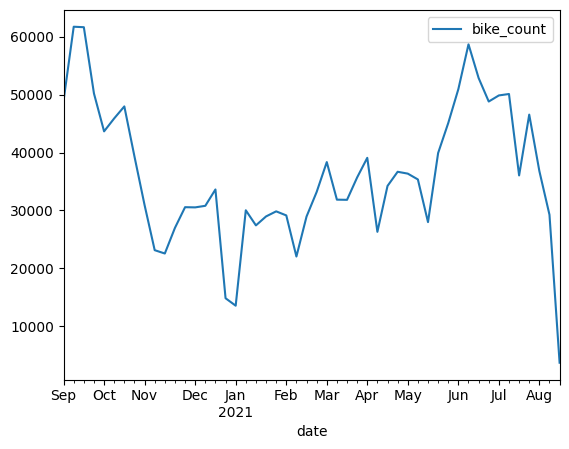

In [71]:
mask = merged_data_orig_HOLIDAYS["counter_name"] == "Totem 73 boulevard de Sébastopol S-N"

merged_data_orig_HOLIDAYS[mask].groupby(pd.Grouper(freq="1w", key="date"))[["bike_count"]].sum().plot()

In [69]:
X_train = pd.read_parquet("data/train.parquet")
X_train['date'] = pd.to_datetime(X_train['date'])
merged_data_orig_HOLIDAYS = _merge_holidays_week_end(X_train)
merged_data_orig_HOLIDAYS.head()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,counter_technical_id,latitude,longitude,log_bike_count,is_holiday,is_weekend
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.000000,False,0
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.693147,False,0
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.000000,False,0
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,1.609438,False,0
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,2.302585,False,0


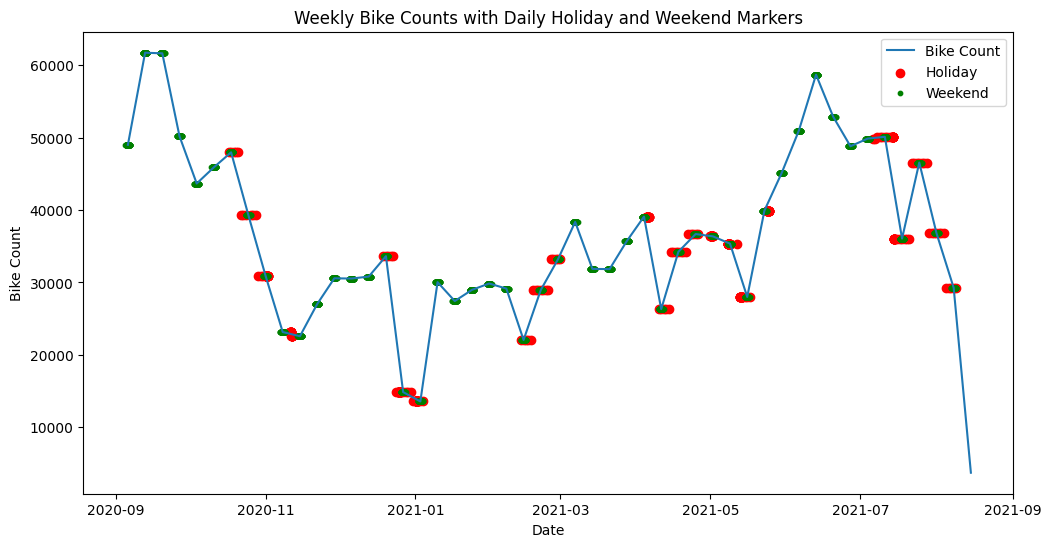

In [70]:
# Apply the mask
filtered_data = merged_data_orig_HOLIDAYS[merged_data_orig_HOLIDAYS["counter_name"] == "Totem 73 boulevard de Sébastopol S-N"]

# Group by week and sum bike counts
weekly_data = filtered_data.groupby(pd.Grouper(freq="1w", key="date"))[["bike_count"]].sum()

# Plotting the bike counts
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data['bike_count'], label='Bike Count')

# Overlaying holiday points for each holiday day
holiday_data = filtered_data[filtered_data['is_holiday'] == 1]
for date in holiday_data['date']:
    # Calculate the difference between the holiday date and each date in the weekly data
    differences = np.abs(weekly_data.index - date)
    # Find the index of the minimum difference
    min_diff_index = np.argmin(differences)
    # Use this index to find the closest weekly date
    closest_weekly_date = weekly_data.index[min_diff_index]
    weekly_count = weekly_data.loc[closest_weekly_date, 'bike_count']
    plt.scatter(date, weekly_count, color='red', label='Holiday' if 'Holiday' not in plt.gca().get_legend_handles_labels()[1] else "")  # red color for holidays

# Overlaying tiny weekend points, only once per day
plotted_weekend_dates = set()
weekend_data = filtered_data[filtered_data['is_weekend'] == 1]
for date in weekend_data['date']:
    if date not in plotted_weekend_dates:
        differences = np.abs(weekly_data.index - date)
        min_diff_index = np.argmin(differences)
        closest_weekly_date = weekly_data.index[min_diff_index]
        weekly_count = weekly_data.loc[closest_weekly_date, 'bike_count']
        plt.scatter(date, weekly_count, color='green', s=10, label='Weekend' if 'Weekend' not in plt.gca().get_legend_handles_labels()[1] else "")  # tiny green points for weekends
        plotted_weekend_dates.add(date)

plt.title('Weekly Bike Counts with Daily Holiday and Weekend Markers')
plt.xlabel('Date')
plt.ylabel('Bike Count')
plt.legend()
plt.show()

<Axes: xlabel='date'>

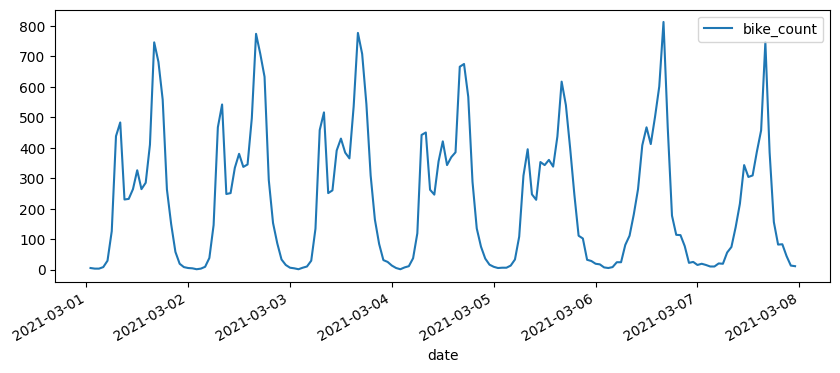

In [73]:
fig, ax = plt.subplots(figsize=(10, 4))

mask = (
    (merged_data_orig_HOLIDAYS["counter_name"] == "Totem 73 boulevard de Sébastopol S-N")
    & (merged_data_orig_HOLIDAYS["date"] > pd.to_datetime("2021/03/01"))
    & (merged_data_orig_HOLIDAYS["date"] < pd.to_datetime("2021/03/08"))
)

merged_data_orig_HOLIDAYS[mask].plot(x="date", y="bike_count", ax=ax)

# Analysis of COVID effects

### ADDING of Curfews and lockdowns

In [6]:
X_train = pd.read_parquet("data/train.parquet")
merged_X_train_COVID = get_data._merge_Curfews_lockdowns_COVID(X_train)
merged_X_train_COVID.head()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,counter_technical_id,latitude,longitude,log_bike_count,is_lockdown,is_curfew
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.000000,False,False
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.693147,False,False
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.000000,False,False
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,1.609438,False,False
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,2.302585,False,False


### ADDING of indicators for monitoring the COVID-19 epidemic

**DATA** from : https://www.data.gouv.fr/fr/datasets/synthese-des-indicateurs-de-suivi-de-lepidemie-covid-19/#/resources 

In [5]:
# Perform the merge, using the new 'date_only' column for matching
merged_X_train_data_COVID = get_data._merge_indicators_COVID(X_train)
merged_X_train_data_COVID.head()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,counter_technical_id,latitude,longitude,log_bike_count,rea,hosp,rea,rad,incid_rea
107,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.000000,42,293,42,6641,3.0
157,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.693147,42,293,42,6641,3.0
193,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.000000,42,293,42,6641,3.0
769,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,1.609438,42,293,42,6641,3.0
959,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,2.302585,42,293,42,6641,3.0


# Analysis of the road accident in Paris for cyclists

DATA from : https://www.data.gouv.fr/fr/datasets/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2022/#/resources

In [5]:
merged_X_train_data_ACCIDENTS = get_data._merge_road_accidents(X_train)
merged_X_train_data_ACCIDENTS.head()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,counter_technical_id,latitude,longitude,log_bike_count,orig_index,Max_Grav_accidents,Count_accidents
107,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.000000,0,NaN,NaN
157,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.693147,1,NaN,NaN
193,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.000000,2,NaN,NaN
769,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,1.609438,3,2.0,2.0
959,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,2.302585,4,2.0,2.0


### DATA for 2020

In [106]:
df_accidents_2020 = _merge_road_accidents_by_year("2020")
df_accidents_2020.head()

,Num_Acc,dep,com,adr,date,Max_Grav_accidents,Count_accidents
9,202000000213,75,75113,RUE DES PEUPLIERS,2020-09-20 01:30:00,3,3
10,202000000214,75,75112,ROUTE DE LA PYRAMIDE,2020-09-20 18:50:00,2,1
12,202000000216,75,75104,RUE DE RIVOLI,2020-09-20 15:00:00,2,1
20,202000000523,75,75114,BOULEVARD JOURDAN,2020-10-19 13:00:00,2,2
23,202000000526,75,75111,BOULEVARD VOLTAIRE,2020-10-19 19:35:00,2,2


### DATA for 2021

In [107]:
df_accidents_2021 = _merge_road_accidents_by_year("2021")
df_accidents_2021.head()

,Num_Acc,dep,com,adr,date,Max_Grav_accidents,Count_accidents
4,202100018903,75,75120,PLACE DE LA PORTE DE MONTREUIL,2021-07-02 10:32:00,4,2
13,202100024893,75,75116,AVENUE DE L HIPPODROME,2021-07-14 20:00:00,2,2
17,202100024897,75,75112,BOULEVARD PONIATOWSKI,2021-08-08 14:50:00,2,2
18,202100024898,75,75111,BOULEVARD DE MENILMONTANT,2021-08-09 08:55:00,2,3
19,202100024899,75,75110,BOULEVARD DE LA VILLETTE,2021-08-09 12:50:00,2,1


We merge both years

In [108]:
df_accidents = pd.concat([df_accidents_2020, df_accidents_2021], ignore_index=True)
df_accidents

,Num_Acc,dep,com,adr,date,Max_Grav_accidents,Count_accidents
0,202000000213,75,75113,RUE DES PEUPLIERS,2020-09-20 01:30:00,3,3
1,202000000214,75,75112,ROUTE DE LA PYRAMIDE,2020-09-20 18:50:00,2,1
2,202000000216,75,75104,RUE DE RIVOLI,2020-09-20 15:00:00,2,1
3,202000000523,75,75114,BOULEVARD JOURDAN,2020-10-19 13:00:00,2,2
4,202000000526,75,75111,BOULEVARD VOLTAIRE,2020-10-19 19:35:00,2,2
...,...,...,...,...,...,...,...
1058,202100056069,75,75112,AVENUE DE SAINT MANDE,2021-01-06 16:15:00,3,2
1059,202100056184,75,75103,RUE MICHEL LE COMTE,2021-01-04 17:35:00,2,1
1060,202100056276,75,75119,RUE MANIN,2021-01-04 18:25:00,2,2
1061,202100056283,75,75101,AVENUE DE L OPERA,2021-01-04 19:40:00,2,2


We've encountered limitations in the volume of data collected. Our initial objective was to meticulously analyze the frequency and severity of accidents for each specific location within our dataset over the course of a year. Unfortunately, the scarcity of data per location does not provide a robust enough foundation for a comprehensive explanatory variable.

Nevertheless, we will proceed to leverage the available data with a revised approach. We postulate that the occurrence of accidents in Paris, regardless of their exact locations, has a tangible impact on the overall bike traffic dynamics. This broader perspective allows us to utilize the data we do have to assess the influence of citywide traffic incidents on cycling patterns.

In [109]:
# Set 'datetime' as the DataFrame index
df_accidents_plt = df_accidents.set_index('date')

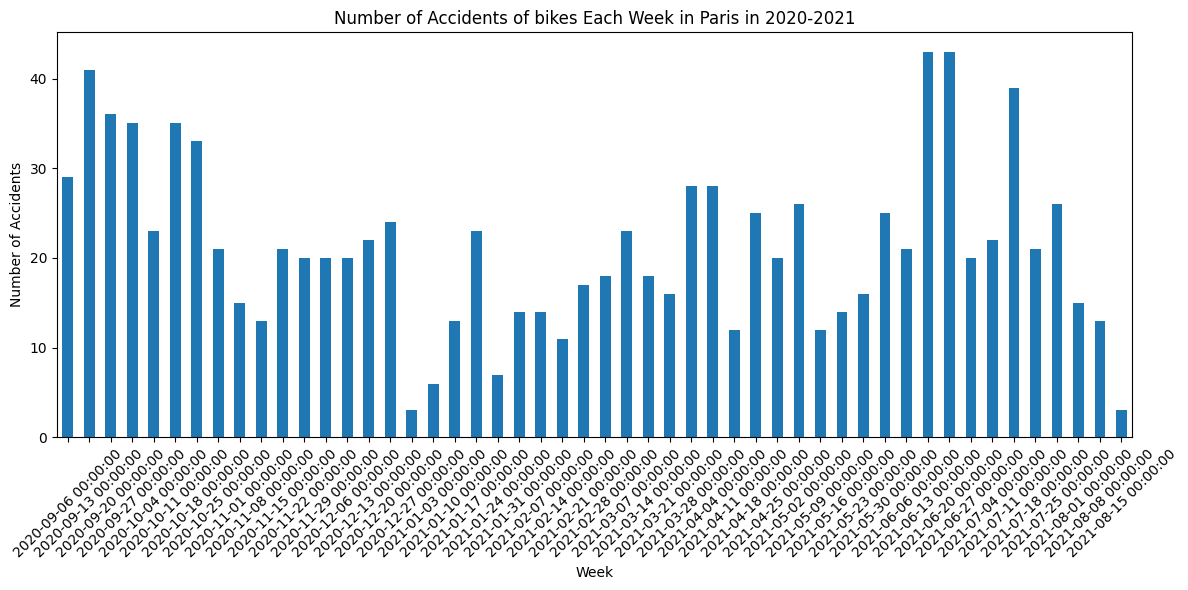

In [110]:
# Now, sort by index
df_accidents_plt = df_accidents_plt.sort_index()

# Group by week and count the number of accidents
weekly_accidents = df_accidents_plt.resample('W').size()

# Plotting the number of accidents per week in Paris
plt.figure(figsize=(12, 6))
weekly_accidents.plot(kind='bar')
plt.title('Number of Accidents of bikes Each Week in Paris in 2020-2021')
plt.xlabel('Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels

# Show plot
plt.show()